In [16]:
import pandas as pd
import json
import numpy as np

%matplotlib inline

In [17]:
business = pd.read_json("../data/business.json", lines=True)
business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [18]:
business.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [19]:
fileName = '../notebooks/restaurant_categories.txt'
category = [line.rstrip('\n') for line in open(fileName)]

In [20]:
import csv

with open('../data/sitin_takeaway.csv', mode='w') as csv_file:
    fieldnames = ['star', 'business_id', 'category','delivery']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    
    for i, j, _id, rate in zip(business['categories'], business['attributes'], business['business_id'], business['stars']):
        if i:
            word = i.split(',')
            for w in word:
                if w in category:
                    if j:
                        if j.get("RestaurantsTakeOut") != None:
                            if j.get("RestaurantsTakeOut") =='True':
                                writer.writerow({'star': rate, 'business_id': _id, 'category': w, 'delivery': 'take_away'})
                            else:
                                writer.writerow({'star': rate, 'business_id': _id, 'category': w, 'delivery': 'sit-in'})
                        else:
                            writer.writerow({'star': rate, 'business_id': _id, 'category': w, 'delivery': 'sit-in'})
delivery = pd.read_csv('../data/sitin_takeaway.csv')
delivery.head()

,star,business_id,category,delivery
0,4.0,gnKjwL_1w79qoiV3IC_xQQ,Sushi Bars,take_away
1,4.0,fweCYi8FmbJXHCqLnwuk8w,Italian,take_away
2,4.0,1RHY4K3BD22FK7Cfftn8Mg,Sandwiches,take_away
3,4.5,tstimHoMcYbkSC4eBA1wEg,Mexican,take_away
4,3.5,BvYU3jvGd0TJ7IyZdfiN2Q,Sandwiches,take_away


In [21]:
with open('../data/price_range.csv', mode='w') as csv_file:
    fieldnames = ['business_id','price','review_count']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for i, j, _id, rate, r in zip(business['categories'], business['attributes'], business['business_id'], business['stars'],business['review_count']):
        if i:
            word = i.split(',')
            for w in word:
                if w in category:
                    if j:
                        if j.get("RestaurantsPriceRange2") != None:
                            if j.get("RestaurantsPriceRange2") == '1':
                                writer.writerow({'business_id': _id, 'price': 'Price1', 'review_count': r})
                            elif j.get("RestaurantsPriceRange2") == '2':
                                writer.writerow({'business_id': _id, 'price': 'Price2', 'review_count': r})
                            else:
                                writer.writerow({'business_id': _id, 'price': 'Price3', 'review_count': r})
price = pd.read_csv('../data/price_range.csv')
price.head(5)

,business_id,price,review_count
0,gnKjwL_1w79qoiV3IC_xQQ,Price2,170
1,fweCYi8FmbJXHCqLnwuk8w,Price2,16
2,1RHY4K3BD22FK7Cfftn8Mg,Price1,35
3,tstimHoMcYbkSC4eBA1wEg,Price1,184
4,BvYU3jvGd0TJ7IyZdfiN2Q,Price2,16


In [69]:
restaurants = delivery.merge(price, on='business_id')
restaurants.head(5)

,star,business_id,category,delivery,price,review_count
0,4.0,gnKjwL_1w79qoiV3IC_xQQ,Sushi Bars,take_away,Price2,170
1,4.0,fweCYi8FmbJXHCqLnwuk8w,Italian,take_away,Price2,16
2,4.0,1RHY4K3BD22FK7Cfftn8Mg,Sandwiches,take_away,Price1,35
3,4.5,tstimHoMcYbkSC4eBA1wEg,Mexican,take_away,Price1,184
4,3.5,BvYU3jvGd0TJ7IyZdfiN2Q,Sandwiches,take_away,Price2,16


In [70]:
res_sitin = restaurants.loc[(restaurants['review_count'] > 20) & (restaurants['delivery']=='sit-in')]
res_sitin.groupby('category').mean().sort_values(by='star', ascending=False).head(10)

,star,review_count
category,,
Wraps,5.000000,30.0
British,4.500000,202.0
German,4.500000,34.0
Vegan,4.333333,167.0
Iberian,4.250000,34.0
Middle Eastern,4.125000,139.5
Caribbean,4.000000,68.5
Noodles,4.000000,24.0
Peruvian,4.000000,21.0


In [71]:
res_takeaway = restaurants.loc[(restaurants['review_count'] > 20) & (restaurants['delivery']=='take_away')]
res_takeaway.groupby('category').mean().sort_values(by='star', ascending=False).head(10)

,star,review_count
category,,
Izakaya,4.500000,193.000000
Japanese Curry,4.500000,312.000000
Armenian,4.500000,155.000000
Burmese,4.333333,41.666667
Venezuelan,4.333333,48.000000
Colombian,4.250000,189.500000
Russian,4.250000,178.000000
Polish,4.136364,103.000000
Lebanese,4.062500,99.437500


In [72]:
top = restaurants.loc[(restaurants['review_count'] > 20)]
top.groupby(['category','delivery','price']).sum().sort_values(by='star', ascending=False).head(10)

,,,star,review_count
category,delivery,price,,
Mexican,take_away,Price1,1890.0,50724
Pizza,take_away,Price2,1722.0,53782
Fast Food,take_away,Price1,1688.0,36117
Italian,take_away,Price2,1666.0,56163
Sandwiches,take_away,Price1,1540.0,36947
Japanese,take_away,Price2,1308.5,48512
Chinese,take_away,Price2,1306.0,38149
Breakfast & Brunch,take_away,Price2,1285.5,74695
Mexican,take_away,Price2,1225.0,49550


In [73]:
best = restaurants.loc[(restaurants['review_count'] > 20)]
best.groupby(['category','delivery','price']).median().sort_values(by='star', ascending=False).head(11)

star  review_count
category        delivery  price                     
Modern European take_away Price1   5.0         103.0
Wraps           sit-in    Price1   5.0          30.0
Vegan           sit-in    Price1   4.5          92.0
Lebanese        take_away Price1   4.5          41.0
                          Price3   4.5          31.0
Gastropubs      take_away Price1   4.5          27.0
Creperies       sit-in    Price1   4.5         131.0
German          sit-in    Price3   4.5          34.0
Colombian       take_away Price1   4.5         275.0
Venezuelan      take_away Price1   4.5          56.5
British         sit-in    Price2   4.5         202.0

In [88]:
bestm = restaurants.loc[(restaurants['review_count'])> 5]
bestm.groupby(['category','delivery','price']).mean().sort_values(by='star', ascending=False).head(11)

,,,star,review_count
category,delivery,price,,
Food Stands,take_away,Price3,5.00,9.000000
Puerto Rican,take_away,Price1,5.00,6.000000
Dominican,sit-in,Price1,5.00,9.000000
Wraps,sit-in,Price1,5.00,30.000000
Modern European,take_away,Price1,4.75,58.500000
Dominican,take_away,Price1,4.75,14.000000
Vietnamese,sit-in,Price2,4.50,17.000000
German,sit-in,Price3,4.50,34.000000
Persian/Iranian,take_away,Price3,4.50,10.000000


In [89]:
res = bestm.reset_index().sort_values(by='star', ascending=False)
res[['delivery','price']].groupby('delivery').count()

,price
delivery,
sit-in,1332
take_away,19118


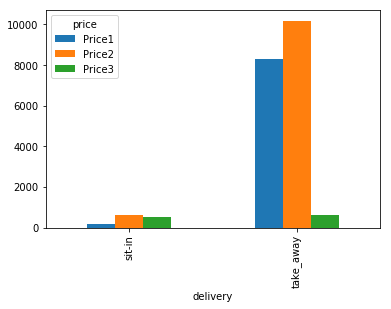

In [90]:
pd.crosstab(res.delivery, res.price).plot(kind='bar')

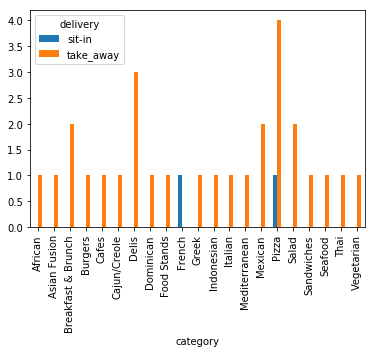

In [100]:
top10 = bestm.reset_index().sort_values(by='star', ascending=False).head(30)
pd.crosstab(top10.category, top10.delivery).plot(kind='bar')